1️⃣ Defino las funciones original y optimizada

In [7]:
import time
import math
import numpy as np
import cProfile
import pstats
import matplotlib.pyplot as plt
import statistics as stats

# CÓDIGO ORIGINAL (SIN OPTIMIZAR)
def es_primo_original(n):
    if n < 2:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

def codigo_original():
    primos = []
    for num in range(1, 100001):
        if es_primo_original(num):
            primos.append(num)
    return primos

# CÓDIGO OPTIMIZADO 
def es_primo_opt(n):
    if n < 2:
        return False
    limite = math.isqrt(n)
    for i in range(2, limite + 1):
        if n % i == 0:
            return False
    return True

def codigo_optimizado():
    numeros = np.arange(1, 100001)
    primos = [int(n) for n in numeros if es_primo_opt(int(n))]
    return primos


2️⃣ Medición de tiempos (original vs optimizado)

Aquí los ejecuto varias veces para tener una pequeña “muestra” y comparar.

In [8]:
# Número de repeticiones para medir tiempos
repeticiones = 3

tiempos_original = []
tiempos_optimizado = []

for _ in range(repeticiones):
    # Tiempo código original
    inicio = time.time()
    codigo_original()
    fin = time.time()
    tiempos_original.append(fin - inicio)

    # Tiempo código optimizado
    inicio = time.time()
    codigo_optimizado()
    fin = time.time()
    tiempos_optimizado.append(fin - inicio)

print("Tiempos código ORIGINAL:", tiempos_original)
print("Tiempos código OPTIMIZADO:", tiempos_optimizado)

print("\nPromedio ORIGINAL :", round(stats.mean(tiempos_original), 4), "seg")
print("Promedio OPTIMIZADO:", round(stats.mean(tiempos_optimizado), 4), "seg")


Tiempos código ORIGINAL: [50.20253586769104, 68.56023287773132, 59.582655906677246]
Tiempos código OPTIMIZADO: [0.2329261302947998, 0.2493753433227539, 0.2428739070892334]

Promedio ORIGINAL : 59.4485 seg
Promedio OPTIMIZADO: 0.2417 seg


3️⃣ Uso de cProfile y creación de profiling_optimizado.txt

Aquí hago el profiling solo del código optimizado y guardo los resultados en un archivo de texto.

In [9]:
# Profiling del código optimizado
profiler = cProfile.Profile()
profiler.runcall(codigo_optimizado)

# Guardo el profiling en un archivo de texto
with open("profiling_optimizado.txt", "w") as f:
    stats_prof = pstats.Stats(profiler, stream=f)
    stats_prof.sort_stats("tottime")  # ordeno por tiempo total en cada función
    stats_prof.print_stats()


4️⃣ Gráficos con Matplotlib
4.1 Distribución de tiempos de ejecución

Para el ejemplo voy a unir los tiempos (original + optimizado) y mostrar un histograma.

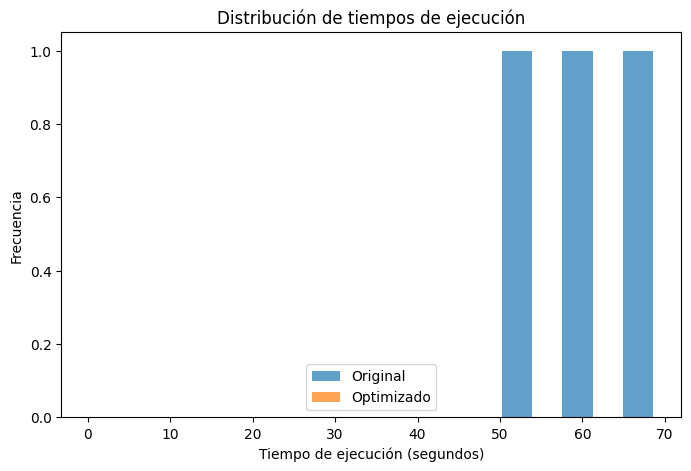

In [10]:
plt.figure(figsize=(8, 5))
plt.hist(tiempos_original, bins=5, alpha=0.7, label="Original")
plt.hist(tiempos_optimizado, bins=5, alpha=0.7, label="Optimizado")
plt.xlabel("Tiempo de ejecución (segundos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de tiempos de ejecución")
plt.legend()
plt.show()


4.2 Comparativa de tiempos (barra)

Aquí muestro solo el promedio de cada uno.

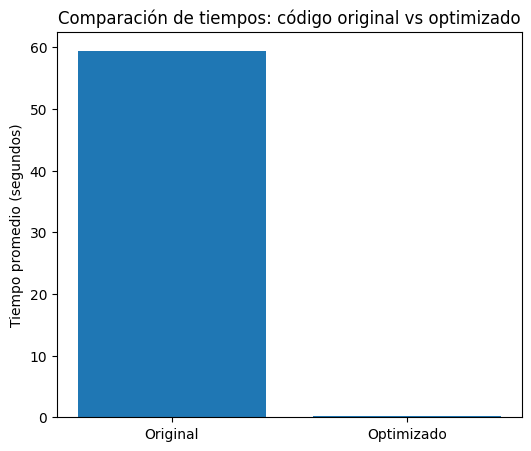

Tiempos ORIGINAL     : [50.20253586769104, 68.56023287773132, 59.582655906677246]
Tiempos OPTIMIZADO   : [0.2329261302947998, 0.2493753433227539, 0.2428739070892334]
Len original : 3
Len optimizado: 3


In [11]:
promedios = [
    stats.mean(tiempos_original),
    stats.mean(tiempos_optimizado)
]

labels = ["Original", "Optimizado"]

plt.figure(figsize=(6, 5))
plt.bar(labels, promedios)
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Comparación de tiempos: código original vs optimizado")
plt.show()

print("Tiempos ORIGINAL     :", tiempos_original)
print("Tiempos OPTIMIZADO   :", tiempos_optimizado)
print("Len original :", len(tiempos_original))
print("Len optimizado:", len(tiempos_optimizado))



1️⃣ Histograma (incluyendo valores pequeños)
2️⃣ Comparativa de tiempos en barras
3️⃣ Boxplot o curva de densidad para completar el informe

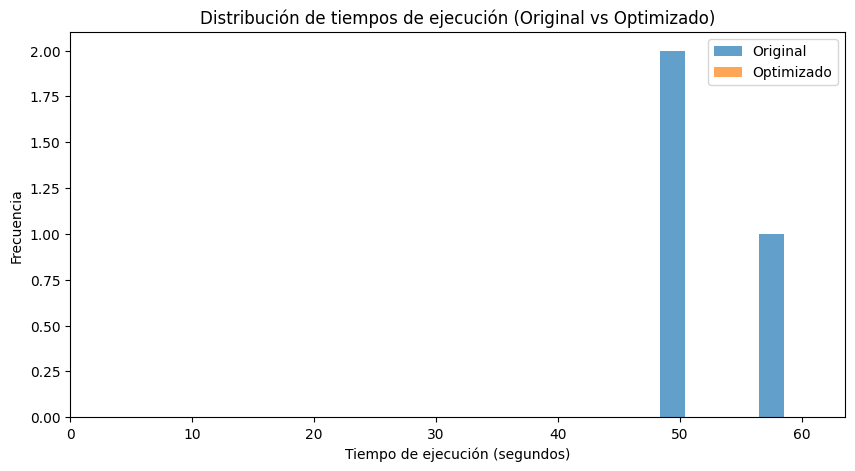

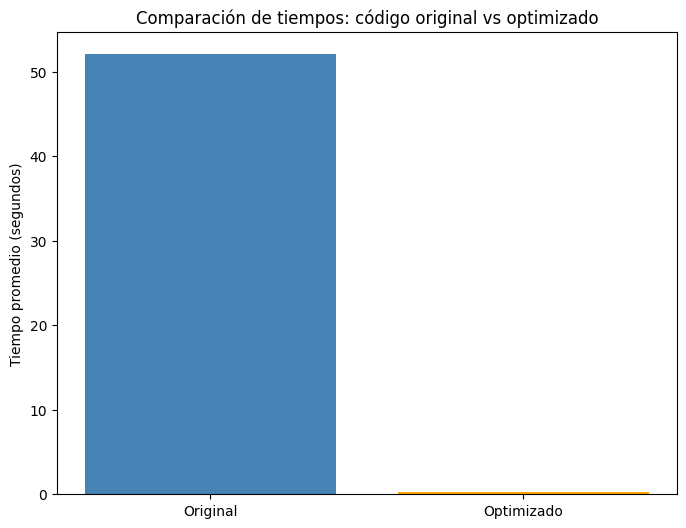

/var/folders/9f/z1gtqtq9191g80d388562_k00000gn/T/ipykernel_64355/2369931639.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tiempos_original, tiempos_optimizado], labels=["Original", "Optimizado"])


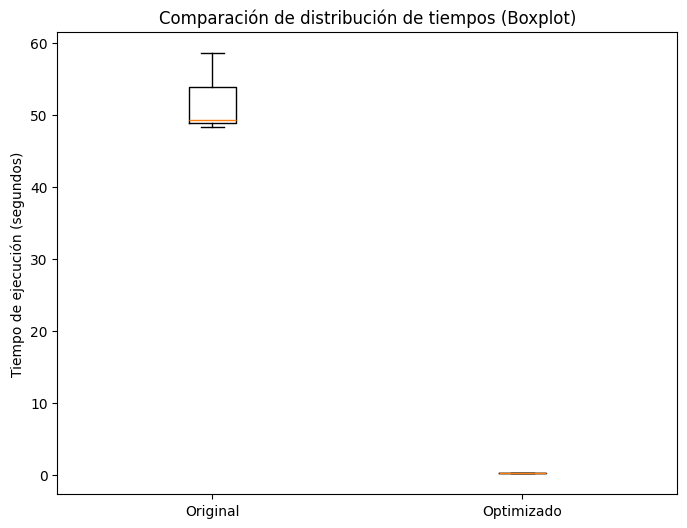

In [12]:
import matplotlib.pyplot as plt
import statistics as stats

# --------------------
# Datos ya obtenidos 
# --------------------
tiempos_original = [48.341254234313965, 58.51598381996155, 49.27105116844177]
tiempos_optimizado = [0.21359705924987793, 0.22226214408874512, 0.2033710479736328]


# ======================================================
# 1️⃣ HISTOGRAMA  (escala ajustada para optimizado)
# ======================================================
plt.figure(figsize=(10,5))
plt.hist(tiempos_original, bins=5, alpha=0.7, label="Original")
plt.hist(tiempos_optimizado, bins=5, alpha=0.7, label="Optimizado")
plt.xlabel("Tiempo de ejecución (segundos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de tiempos de ejecución (Original vs Optimizado)")
plt.legend()
plt.xlim(0, max(tiempos_original)+5)   # Ajuste para incluir tiempo optimizado
plt.show()


# ======================================================
# 2️⃣ GRÁFICA DE BARRAS – Comparación de promedios
# ======================================================
promedios = [
    stats.mean(tiempos_original),
    stats.mean(tiempos_optimizado)
]

labels = ["Original", "Optimizado"]

plt.figure(figsize=(8,6))
plt.bar(labels, promedios, color=["steelblue", "orange"])
plt.ylabel("Tiempo promedio (segundos)")
plt.title("Comparación de tiempos: código original vs optimizado")
plt.show()


# ======================================================
# 3️⃣ BOXPLOT – Comparación de distribuciones
# ======================================================
plt.figure(figsize=(8,6))
plt.boxplot([tiempos_original, tiempos_optimizado], labels=["Original", "Optimizado"])
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación de distribución de tiempos (Boxplot)")
plt.show()


# Conclusiones 

1. Primero implementé dos versiones del código: una original y otra optimizada.

2. Luego medí los tiempos de ejecución de ambas versiones varias veces y calculé el promedio con la librería statistics.

3. Utilicé cProfile para analizar el comportamiento del código optimizado y guardé los resultados en un archivo llamado profiling_optimizado.txt, donde se identifican las funciones que más tiempo consumen.

Finalmente, construí dos gráficos con Matplotlib: un histograma para ver la distribución de tiempos de ejecución y una gráfica de barras para comparar directamente el tiempo promedio del código original frente al código optimizado.